In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('test_data.csv')
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [3]:
dates=data.date.unique()
dates.sort()
days=[i[8:10] for i in dates]

In [4]:
number=[data[data['date']==i].count()[0] for i in dates]

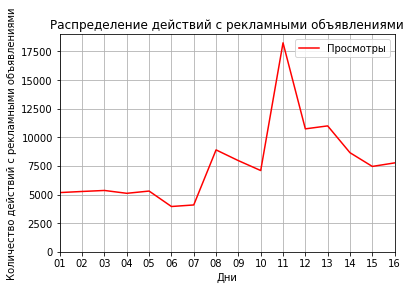

In [5]:
fig, sp = plt.subplots()
sp.plot(days, number, color = "red", label = "Просмотры")
sp.axis([0, len(days)-1, 0, 19000])

plt.title(u'Распределение действий с рекламными объявлениями')
plt.grid(True)

sp.set_xlabel("Дни")
sp.set_ylabel("Количество действий с рекламными объявлениями")
sp.legend()

In [13]:
anomal=data[data['date']==dates[10]]
anomal['time']=pd.to_datetime(anomal['time'], unit='s')
anomal['hour'] = anomal['time'].dt.hour
anomal.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,hour
4,2019-04-11 07:11:57,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11,7
16,2019-04-11 20:02:17,view,CPC,0,agency_2,client_47269,campaign_47269,ad_47269,android,2019-04-11,20
19,2019-04-11 19:30:01,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,19
22,2019-04-11 10:08:03,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,10
25,2019-04-11 06:31:51,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11,6


In [7]:
max(anomal['campaign_union_id'].value_counts())

13941

In [8]:
max(anomal['client_union_id'].value_counts())

13941

In [9]:
max(anomal['ad_id'].value_counts())

9640

In [10]:
ancam=anomal[anomal['client_union_id']=='client_47270'][anomal['campaign_union_id']=='campaign_49554'][anomal['ad_id']=='ad_49554']
ancam=ancam.sort_values('time', ascending=False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [28]:
ancam.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,hour
57845,2019-04-11 23:59:57,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,23
110671,2019-04-11 23:59:49,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,23
62283,2019-04-11 23:59:37,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,23
55967,2019-04-11 23:59:19,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,23
3686,2019-04-11 23:59:10,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,23


In [22]:
hh=[len(ancam[ancam['hour']==i]) for i in range(9,24)]
h=[i for i in range(9,24)]

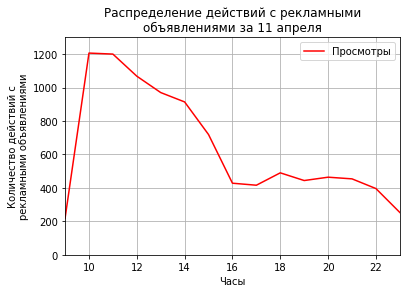

In [32]:
fig, sp = plt.subplots()
sp.plot(h, hh, color = "red", label = "Просмотры")
sp.axis([9, 23, 0,1300])

plt.title(u'Распределение действий с рекламными\nобъявлениями за 11 апреля')
plt.grid(True)

sp.set_xlabel("Часы")
sp.set_ylabel("Количество действий с\nрекламными объявлениями")
sp.legend()

Резкое увелечение действий с сообщениями произошло 11 апреля. Это связано с рекламной кампанией - campaign_49554.
Аномальное количество действий было зафиксировано, начиная с 10 до 11 часов, дальше был спад.